# A Simple Autoencoder

We'll start off by building a simple autoencoder to compress the MNIST dataset. With autoencoders, we pass input data through an encoder that makes a compressed representation of the input. Then, this representation is passed through a decoder to reconstruct the input data. Generally the encoder and decoder will be built with neural networks, then trained on example data.

![Autoencoder](assets/autoencoder_1.png)

In this notebook, we'll be build a simple network architecture for the encoder and decoder. Let's get started by importing our libraries and getting the dataset.

In [2]:
%matplotlib inline

import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

/Users/andjela/anaconda3/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.6 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.7
  return f(*args, **kwds)


In [3]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets('MNIST_data', validation_size=0)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.


Below I'm plotting an example image from the MNIST dataset. These are 28x28 grayscale images of handwritten digits.

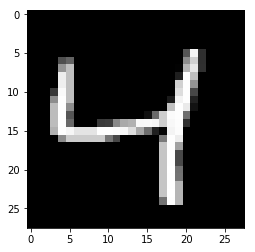

In [4]:
img = mnist.train.images[2]
plt.imshow(img.reshape((28, 28)), cmap='Greys_r')

We'll train an autoencoder with these images by flattening them into 784 length vectors. The images from this dataset are already normalized such that the values are between 0 and 1. Let's start by building basically the simplest autoencoder with a **single ReLU hidden layer**. This layer will be used as the compressed representation. Then, the encoder is the input layer and the hidden layer. The decoder is the hidden layer and the output layer. Since the images are normalized between 0 and 1, we need to use a **sigmoid activation on the output layer** to get values matching the input.

![Autoencoder architecture](assets/simple_autoencoder.png)


> **Exercise:** Build the graph for the autoencoder in the cell below. The input images will be flattened into 784 length vectors. The targets are the same as the inputs. And there should be one hidden layer with a ReLU activation and an output layer with a sigmoid activation. The loss should be calculated with the cross-entropy loss, there is a convenient TensorFlow function for this `tf.nn.sigmoid_cross_entropy_with_logits` ([documentation](https://www.tensorflow.org/api_docs/python/tf/nn/sigmoid_cross_entropy_with_logits)). You should note that `tf.nn.sigmoid_cross_entropy_with_logits` takes the logits, but to get the reconstructed images you'll need to pass the logits through the sigmoid function.

In [5]:
# Size of the encoding layer (the hidden layer)
encoding_dim = 32

image_size = mnist.train.images.shape[1]

inputs_ = tf.placeholder(tf.float32, (None, image_size), name='inputs')
targets_ = tf.placeholder(tf.float32, (None, image_size), name='targets')

# Output of hidden layer
encoded = tf.layers.dense(inputs_, encoding_dim, activation=tf.nn.relu)

# Output layer logits
logits = tf.layers.dense(encoded, image_size, activation=None)
# Sigmoid output from
decoded = tf.nn.sigmoid(logits, name='output')

loss = tf.nn.sigmoid_cross_entropy_with_logits(labels=targets_, logits=logits)
cost = tf.reduce_mean(loss)
opt = tf.train.AdamOptimizer(0.001).minimize(cost)

## Training

In [6]:
# Create the session
sess = tf.Session()

Here I'll write a bit of code to train the network. I'm not too interested in validation here, so I'll just monitor the training loss and the test loss afterwards. 

Calling `mnist.train.next_batch(batch_size)` will return a tuple of `(images, labels)`. We're not concerned with the labels here, we just need the images. Otherwise this is pretty straightfoward training with TensorFlow. We initialize the variables with `sess.run(tf.global_variables_initializer())`. Then, run the optimizer and get the loss with `batch_cost, _ = sess.run([cost, opt], feed_dict=feed)`.

In [7]:
epochs = 20
batch_size = 200
sess.run(tf.global_variables_initializer())
for e in range(epochs):
    for ii in range(mnist.train.num_examples//batch_size):
        batch = mnist.train.next_batch(batch_size)
        feed = {inputs_: batch[0], targets_: batch[0]}
        batch_cost, _ = sess.run([cost, opt], feed_dict=feed)

        print("Epoch: {}/{}...".format(e+1, epochs),
              "Training loss: {:.4f}".format(batch_cost))

Epoch: 1/20... Training loss: 0.6939
Epoch: 1/20... Training loss: 0.6910
Epoch: 1/20... Training loss: 0.6879
Epoch: 1/20... Training loss: 0.6844
Epoch: 1/20... Training loss: 0.6800
Epoch: 1/20... Training loss: 0.6748
Epoch: 1/20... Training loss: 0.6690
Epoch: 1/20... Training loss: 0.6620
Epoch: 1/20... Training loss: 0.6520
Epoch: 1/20... Training loss: 0.6437
Epoch: 1/20... Training loss: 0.6317
Epoch: 1/20... Training loss: 0.6194
Epoch: 1/20... Training loss: 0.6061
Epoch: 1/20... Training loss: 0.5892
Epoch: 1/20... Training loss: 0.5780
Epoch: 1/20... Training loss: 0.5600
Epoch: 1/20... Training loss: 0.5393
Epoch: 1/20... Training loss: 0.5217
Epoch: 1/20... Training loss: 0.5101
Epoch: 1/20... Training loss: 0.4878
Epoch: 1/20... Training loss: 0.4671
Epoch: 1/20... Training loss: 0.4535
Epoch: 1/20... Training loss: 0.4358
Epoch: 1/20... Training loss: 0.4172
Epoch: 1/20... Training loss: 0.4069
Epoch: 1/20... Training loss: 0.3958
Epoch: 1/20... Training loss: 0.3790
E

Epoch: 1/20... Training loss: 0.1913
Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1982
Epoch: 1/20... Training loss: 0.1961
Epoch: 1/20... Training loss: 0.1953
Epoch: 1/20... Training loss: 0.1915
Epoch: 1/20... Training loss: 0.1897
Epoch: 1/20... Training loss: 0.1931
Epoch: 1/20... Training loss: 0.1962
Epoch: 1/20... Training loss: 0.1867
Epoch: 1/20... Training loss: 0.1978
Epoch: 1/20... Training loss: 0.1889
Epoch: 1/20... Training loss: 0.1915
Epoch: 1/20... Training loss: 0.1919
Epoch: 1/20... Training loss: 0.1934
Epoch: 1/20... Training loss: 0.1846
Epoch: 1/20... Training loss: 0.1882
Epoch: 1/20... Training loss: 0.1896
Epoch: 1/20... Training loss: 0.1839
Epoch: 1/20... Training loss: 0.1905
Epoch: 1/20... Training loss: 0.1910
Epoch: 1/20... Training loss: 0.1930
Epoch: 1/20... Training loss: 0.1893
Epoch: 1/20... Training loss: 0.1884
Epoch: 1/20... Training loss: 0.1933
Epoch: 1/20... Training loss: 0.1892
Epoch: 1/20... Training loss: 0.1898
E

Epoch: 2/20... Training loss: 0.1541
Epoch: 2/20... Training loss: 0.1517
Epoch: 2/20... Training loss: 0.1513
Epoch: 2/20... Training loss: 0.1555
Epoch: 2/20... Training loss: 0.1573
Epoch: 2/20... Training loss: 0.1508
Epoch: 2/20... Training loss: 0.1607
Epoch: 2/20... Training loss: 0.1615
Epoch: 2/20... Training loss: 0.1529
Epoch: 2/20... Training loss: 0.1522
Epoch: 2/20... Training loss: 0.1499
Epoch: 2/20... Training loss: 0.1500
Epoch: 2/20... Training loss: 0.1535
Epoch: 2/20... Training loss: 0.1502
Epoch: 2/20... Training loss: 0.1521
Epoch: 2/20... Training loss: 0.1507
Epoch: 2/20... Training loss: 0.1561
Epoch: 2/20... Training loss: 0.1525
Epoch: 2/20... Training loss: 0.1507
Epoch: 2/20... Training loss: 0.1547
Epoch: 2/20... Training loss: 0.1575
Epoch: 2/20... Training loss: 0.1523
Epoch: 2/20... Training loss: 0.1511
Epoch: 2/20... Training loss: 0.1507
Epoch: 2/20... Training loss: 0.1550
Epoch: 2/20... Training loss: 0.1538
Epoch: 2/20... Training loss: 0.1460
E

Epoch: 3/20... Training loss: 0.1288
Epoch: 3/20... Training loss: 0.1350
Epoch: 3/20... Training loss: 0.1313
Epoch: 3/20... Training loss: 0.1317
Epoch: 3/20... Training loss: 0.1400
Epoch: 3/20... Training loss: 0.1332
Epoch: 3/20... Training loss: 0.1319
Epoch: 3/20... Training loss: 0.1345
Epoch: 3/20... Training loss: 0.1349
Epoch: 3/20... Training loss: 0.1353
Epoch: 3/20... Training loss: 0.1370
Epoch: 3/20... Training loss: 0.1380
Epoch: 3/20... Training loss: 0.1309
Epoch: 3/20... Training loss: 0.1333
Epoch: 3/20... Training loss: 0.1338
Epoch: 3/20... Training loss: 0.1410
Epoch: 3/20... Training loss: 0.1329
Epoch: 3/20... Training loss: 0.1359
Epoch: 3/20... Training loss: 0.1343
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1340
Epoch: 3/20... Training loss: 0.1290
Epoch: 3/20... Training loss: 0.1324
Epoch: 3/20... Training loss: 0.1322
Epoch: 3/20... Training loss: 0.1365
Epoch: 3/20... Training loss: 0.1293
Epoch: 3/20... Training loss: 0.1317
E

Epoch: 4/20... Training loss: 0.1251
Epoch: 4/20... Training loss: 0.1232
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1229
Epoch: 4/20... Training loss: 0.1214
Epoch: 4/20... Training loss: 0.1288
Epoch: 4/20... Training loss: 0.1272
Epoch: 4/20... Training loss: 0.1261
Epoch: 4/20... Training loss: 0.1204
Epoch: 4/20... Training loss: 0.1234
Epoch: 4/20... Training loss: 0.1278
Epoch: 4/20... Training loss: 0.1219
Epoch: 4/20... Training loss: 0.1193
Epoch: 4/20... Training loss: 0.1186
Epoch: 4/20... Training loss: 0.1253
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1227
Epoch: 4/20... Training loss: 0.1241
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1255
Epoch: 4/20... Training loss: 0.1199
Epoch: 4/20... Training loss: 0.1197
Epoch: 4/20... Training loss: 0.1224
Epoch: 4/20... Training loss: 0.1231
Epoch: 4/20... Training loss: 0.1190
Epoch: 4/20... Training loss: 0.1248
E

Epoch: 4/20... Training loss: 0.1136
Epoch: 4/20... Training loss: 0.1156
Epoch: 4/20... Training loss: 0.1131
Epoch: 4/20... Training loss: 0.1135
Epoch: 4/20... Training loss: 0.1142
Epoch: 4/20... Training loss: 0.1114
Epoch: 4/20... Training loss: 0.1132
Epoch: 4/20... Training loss: 0.1126
Epoch: 4/20... Training loss: 0.1163
Epoch: 4/20... Training loss: 0.1166
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1215
Epoch: 4/20... Training loss: 0.1130
Epoch: 4/20... Training loss: 0.1171
Epoch: 4/20... Training loss: 0.1101
Epoch: 4/20... Training loss: 0.1154
Epoch: 4/20... Training loss: 0.1169
Epoch: 4/20... Training loss: 0.1128
Epoch: 4/20... Training loss: 0.1137
Epoch: 4/20... Training loss: 0.1159
Epoch: 4/20... Training loss: 0.1144
Epoch: 4/20... Training loss: 0.1118
Epoch: 4/20... Training loss: 0.1132
Epoch: 4/20... Training loss: 0.1165
Epoch: 4/20... Training loss: 0.1175
Epoch: 4/20... Training loss: 0.1162
Epoch: 4/20... Training loss: 0.1117
E

Epoch: 5/20... Training loss: 0.1051
Epoch: 5/20... Training loss: 0.1032
Epoch: 5/20... Training loss: 0.1098
Epoch: 5/20... Training loss: 0.1101
Epoch: 5/20... Training loss: 0.1092
Epoch: 5/20... Training loss: 0.1099
Epoch: 5/20... Training loss: 0.1141
Epoch: 5/20... Training loss: 0.1071
Epoch: 5/20... Training loss: 0.1100
Epoch: 5/20... Training loss: 0.1093
Epoch: 5/20... Training loss: 0.1105
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1058
Epoch: 5/20... Training loss: 0.1094
Epoch: 5/20... Training loss: 0.1081
Epoch: 5/20... Training loss: 0.1077
Epoch: 5/20... Training loss: 0.1052
Epoch: 5/20... Training loss: 0.1030
Epoch: 5/20... Training loss: 0.1091
Epoch: 5/20... Training loss: 0.1107
Epoch: 5/20... Training loss: 0.1073
Epoch: 5/20... Training loss: 0.1090
Epoch: 5/20... Training loss: 0.1108
Epoch: 5/20... Training loss: 0.1038
Epoch: 5/20... Training loss: 0.1065
Epoch: 5/20... Training loss: 0.1054
Epoch: 5/20... Training loss: 0.1064
E

Epoch: 6/20... Training loss: 0.1019
Epoch: 6/20... Training loss: 0.1038
Epoch: 6/20... Training loss: 0.1006
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1050
Epoch: 6/20... Training loss: 0.1042
Epoch: 6/20... Training loss: 0.0989
Epoch: 6/20... Training loss: 0.1018
Epoch: 6/20... Training loss: 0.1030
Epoch: 6/20... Training loss: 0.1092
Epoch: 6/20... Training loss: 0.0990
Epoch: 6/20... Training loss: 0.1024
Epoch: 6/20... Training loss: 0.1027
Epoch: 6/20... Training loss: 0.1057
Epoch: 6/20... Training loss: 0.1032
Epoch: 6/20... Training loss: 0.1004
Epoch: 6/20... Training loss: 0.1033
Epoch: 6/20... Training loss: 0.1026
Epoch: 6/20... Training loss: 0.1044
Epoch: 6/20... Training loss: 0.1047
Epoch: 6/20... Training loss: 0.1051
Epoch: 6/20... Training loss: 0.1063
Epoch: 6/20... Training loss: 0.1029
Epoch: 6/20... Training loss: 0.1022
Epoch: 6/20... Training loss: 0.1034
Epoch: 6/20... Training loss: 0.1025
Epoch: 6/20... Training loss: 0.1055
E

Epoch: 7/20... Training loss: 0.1045
Epoch: 7/20... Training loss: 0.1044
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1030
Epoch: 7/20... Training loss: 0.1013
Epoch: 7/20... Training loss: 0.0983
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.1017
Epoch: 7/20... Training loss: 0.1037
Epoch: 7/20... Training loss: 0.0994
Epoch: 7/20... Training loss: 0.1023
Epoch: 7/20... Training loss: 0.1007
Epoch: 7/20... Training loss: 0.0981
Epoch: 7/20... Training loss: 0.1048
Epoch: 7/20... Training loss: 0.0980
Epoch: 7/20... Training loss: 0.0993
Epoch: 7/20... Training loss: 0.1012
Epoch: 7/20... Training loss: 0.1035
Epoch: 7/20... Training loss: 0.1020
Epoch: 7/20... Training loss: 0.1006
Epoch: 7/20... Training loss: 0.0998
Epoch: 7/20... Training loss: 0.1010
Epoch: 7/20... Training loss: 0.0986
Epoch: 7/20... Training loss: 0.1018
Epoch: 7/20... Training loss: 0.1031
Epoch: 7/20... Training loss: 0.1032
Epoch: 7/20... Training loss: 0.1030
E

Epoch: 8/20... Training loss: 0.1009
Epoch: 8/20... Training loss: 0.0994
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.1029
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0990
Epoch: 8/20... Training loss: 0.0991
Epoch: 8/20... Training loss: 0.1019
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0987
Epoch: 8/20... Training loss: 0.1012
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0969
Epoch: 8/20... Training loss: 0.0975
Epoch: 8/20... Training loss: 0.0979
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0957
Epoch: 8/20... Training loss: 0.0961
Epoch: 8/20... Training loss: 0.0976
Epoch: 8/20... Training loss: 0.0971
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.1002
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0988
E

Epoch: 8/20... Training loss: 0.0970
Epoch: 8/20... Training loss: 0.0934
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0997
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0981
Epoch: 8/20... Training loss: 0.0993
Epoch: 8/20... Training loss: 0.0988
Epoch: 8/20... Training loss: 0.0968
Epoch: 8/20... Training loss: 0.0972
Epoch: 8/20... Training loss: 0.0933
Epoch: 8/20... Training loss: 0.0956
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.0951
Epoch: 8/20... Training loss: 0.0967
Epoch: 8/20... Training loss: 0.0986
Epoch: 8/20... Training loss: 0.0933
Epoch: 8/20... Training loss: 0.0962
Epoch: 8/20... Training loss: 0.0963
Epoch: 8/20... Training loss: 0.1008
Epoch: 8/20... Training loss: 0.0983
Epoch: 8/20... Training loss: 0.0964
Epoch: 8/20... Training loss: 0.0973
Epoch: 8/20... Training loss: 0.0961
E

Epoch: 9/20... Training loss: 0.0937
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0976
Epoch: 9/20... Training loss: 0.0951
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0971
Epoch: 9/20... Training loss: 0.0950
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0970
Epoch: 9/20... Training loss: 0.0967
Epoch: 9/20... Training loss: 0.0935
Epoch: 9/20... Training loss: 0.0966
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0959
Epoch: 9/20... Training loss: 0.0964
Epoch: 9/20... Training loss: 0.0949
Epoch: 9/20... Training loss: 0.0994
Epoch: 9/20... Training loss: 0.0930
Epoch: 9/20... Training loss: 0.0955
Epoch: 9/20... Training loss: 0.0952
Epoch: 9/20... Training loss: 0.0980
Epoch: 9/20... Training loss: 0.0910
Epoch: 9/20... Training loss: 0.0960
Epoch: 9/20... Training loss: 0.0956
Epoch: 9/20... Training loss: 0.0965
Epoch: 9/20... Training loss: 0.0920
Epoch: 9/20... Training loss: 0.0938
E

Epoch: 10/20... Training loss: 0.0931
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0959
Epoch: 10/20... Training loss: 0.0977
Epoch: 10/20... Training loss: 0.0945
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0956
Epoch: 10/20... Training loss: 0.0972
Epoch: 10/20... Training loss: 0.0997
Epoch: 10/20... Training loss: 0.0922
Epoch: 10/20... Training loss: 0.0920
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20... Training loss: 0.0948
Epoch: 10/20... Training loss: 0.0932
Epoch: 10/20... Training loss: 0.0937
Epoch: 10/20... Training loss: 0.0936
Epoch: 10/20... Training loss: 0.0967
Epoch: 10/20... Training loss: 0.0949
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0951
Epoch: 10/20... Training loss: 0.0934
Epoch: 10/20... Training loss: 0.0930
Epoch: 10/20... Training loss: 0.0919
Epoch: 10/20... Training loss: 0.0966
Epoch: 10/20... Training loss: 0.0963
Epoch: 10/20

Epoch: 11/20... Training loss: 0.0940
Epoch: 11/20... Training loss: 0.0923
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0948
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0936
Epoch: 11/20... Training loss: 0.0965
Epoch: 11/20... Training loss: 0.0919
Epoch: 11/20... Training loss: 0.0950
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0959
Epoch: 11/20... Training loss: 0.0939
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0974
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0973
Epoch: 11/20... Training loss: 0.0986
Epoch: 11/20... Training loss: 0.0922
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0905
Epoch: 11/20... Training loss: 0.0924
Epoch: 11/20... Training loss: 0.0943
Epoch: 11/20... Training loss: 0.0927
Epoch: 11/20... Training loss: 0.0962
Epoch: 11/20... Training loss: 0.0960
Epoch: 11/20

Epoch: 11/20... Training loss: 0.0945
Epoch: 11/20... Training loss: 0.0964
Epoch: 11/20... Training loss: 0.0942
Epoch: 11/20... Training loss: 0.0934
Epoch: 11/20... Training loss: 0.1011
Epoch: 11/20... Training loss: 0.0949
Epoch: 11/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0927
Epoch: 12/20... Training loss: 0.0916
Epoch: 12/20... Training loss: 0.0935
Epoch: 12/20... Training loss: 0.0891
Epoch: 12/20... Training loss: 0.0932
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0922
Epoch: 12/20... Training loss: 0.0933
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0885
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0929
Epoch: 12/20... Training loss: 0.0892
Epoch: 12/20... Training loss: 0.0946
Epoch: 12/20... Training loss: 0.1002
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20

Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0930
Epoch: 12/20... Training loss: 0.0918
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0950
Epoch: 12/20... Training loss: 0.0917
Epoch: 12/20... Training loss: 0.0925
Epoch: 12/20... Training loss: 0.0993
Epoch: 12/20... Training loss: 0.0924
Epoch: 12/20... Training loss: 0.0962
Epoch: 12/20... Training loss: 0.0964
Epoch: 12/20... Training loss: 0.0901
Epoch: 12/20... Training loss: 0.0970
Epoch: 12/20... Training loss: 0.0972
Epoch: 12/20... Training loss: 0.0982
Epoch: 12/20... Training loss: 0.0936
Epoch: 12/20... Training loss: 0.0947
Epoch: 12/20... Training loss: 0.0959
Epoch: 12/20... Training loss: 0.0931
Epoch: 12/20... Training loss: 0.0979
Epoch: 12/20... Training loss: 0.0944
Epoch: 12/20... Training loss: 0.0912
Epoch: 12/20... Training loss: 0.0958
Epoch: 12/20... Training loss: 0.0966
Epoch: 12/20... Training loss: 0.0939
Epoch: 12/20... Training loss: 0.0980
Epoch: 12/20

Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0955
Epoch: 13/20... Training loss: 0.0944
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0947
Epoch: 13/20... Training loss: 0.0949
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0946
Epoch: 13/20... Training loss: 0.0907
Epoch: 13/20... Training loss: 0.0956
Epoch: 13/20... Training loss: 0.0963
Epoch: 13/20... Training loss: 0.0909
Epoch: 13/20... Training loss: 0.0969
Epoch: 13/20... Training loss: 0.0927
Epoch: 13/20... Training loss: 0.0939
Epoch: 13/20... Training loss: 0.0911
Epoch: 13/20... Training loss: 0.0942
Epoch: 13/20... Training loss: 0.0924
Epoch: 13/20... Training loss: 0.0957
Epoch: 13/20... Training loss: 0.0934
Epoch: 13/20... Training loss: 0.0921
Epoch: 13/20... Training loss: 0.0906
Epoch: 13/20... Training loss: 0.0923
Epoch: 13/20... Training loss: 0.0928
Epoch: 13/20... Training loss: 0.0960
Epoch: 13/20... Training loss: 0.0935
Epoch: 13/20

Epoch: 14/20... Training loss: 0.0977
Epoch: 14/20... Training loss: 0.0978
Epoch: 14/20... Training loss: 0.0903
Epoch: 14/20... Training loss: 0.0906
Epoch: 14/20... Training loss: 0.0918
Epoch: 14/20... Training loss: 0.0964
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0954
Epoch: 14/20... Training loss: 0.0931
Epoch: 14/20... Training loss: 0.0933
Epoch: 14/20... Training loss: 0.0912
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0966
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0929
Epoch: 14/20... Training loss: 0.0923
Epoch: 14/20... Training loss: 0.0910
Epoch: 14/20... Training loss: 0.0957
Epoch: 14/20... Training loss: 0.0938
Epoch: 14/20... Training loss: 0.0960
Epoch: 14/20... Training loss: 0.0946
Epoch: 14/20... Training loss: 0.0950
Epoch: 14/20... Training loss: 0.0937
Epoch: 14/20... Training loss: 0.0949
Epoch: 14/20... Training loss: 0.0926
Epoch: 14/20... Training loss: 0.0927
Epoch: 14/20

Epoch: 15/20... Training loss: 0.0884
Epoch: 15/20... Training loss: 0.0977
Epoch: 15/20... Training loss: 0.0916
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0960
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0961
Epoch: 15/20... Training loss: 0.0909
Epoch: 15/20... Training loss: 0.0920
Epoch: 15/20... Training loss: 0.0927
Epoch: 15/20... Training loss: 0.0915
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0944
Epoch: 15/20... Training loss: 0.0984
Epoch: 15/20... Training loss: 0.0914
Epoch: 15/20... Training loss: 0.0936
Epoch: 15/20... Training loss: 0.0967
Epoch: 15/20... Training loss: 0.0893
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0937
Epoch: 15/20... Training loss: 0.0955
Epoch: 15/20... Training loss: 0.0954
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20

Epoch: 15/20... Training loss: 0.0894
Epoch: 15/20... Training loss: 0.0932
Epoch: 15/20... Training loss: 0.0959
Epoch: 15/20... Training loss: 0.0947
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0971
Epoch: 15/20... Training loss: 0.0953
Epoch: 15/20... Training loss: 0.0935
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0900
Epoch: 15/20... Training loss: 0.0950
Epoch: 15/20... Training loss: 0.0942
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0908
Epoch: 15/20... Training loss: 0.0964
Epoch: 15/20... Training loss: 0.0912
Epoch: 15/20... Training loss: 0.0956
Epoch: 15/20... Training loss: 0.0926
Epoch: 15/20... Training loss: 0.0958
Epoch: 15/20... Training loss: 0.0928
Epoch: 15/20... Training loss: 0.0966
Epoch: 15/20... Training loss: 0.0930
Epoch: 15/20... Training loss: 0.0957
Epoch: 15/20... Training loss: 0.0952
Epoch: 15/20... Training loss: 0.0923
Epoch: 15/20

Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0954
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0923
Epoch: 16/20... Training loss: 0.0940
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0963
Epoch: 16/20... Training loss: 0.0952
Epoch: 16/20... Training loss: 0.0924
Epoch: 16/20... Training loss: 0.0944
Epoch: 16/20... Training loss: 0.0962
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0948
Epoch: 16/20... Training loss: 0.0914
Epoch: 16/20... Training loss: 0.0946
Epoch: 16/20... Training loss: 0.0938
Epoch: 16/20... Training loss: 0.0916
Epoch: 16/20... Training loss: 0.0932
Epoch: 16/20... Training loss: 0.0958
Epoch: 16/20... Training loss: 0.0968
Epoch: 16/20... Training loss: 0.0941
Epoch: 16/20... Training loss: 0.0927
Epoch: 16/20... Training loss: 0.0926
Epoch: 16/20... Training loss: 0.0947
Epoch: 16/20... Training loss: 0.0903
Epoch: 16/20... Training loss: 0.0911
Epoch: 16/20

Epoch: 17/20... Training loss: 0.0926
Epoch: 17/20... Training loss: 0.0956
Epoch: 17/20... Training loss: 0.0962
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0915
Epoch: 17/20... Training loss: 0.0886
Epoch: 17/20... Training loss: 0.0961
Epoch: 17/20... Training loss: 0.0925
Epoch: 17/20... Training loss: 0.0895
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20... Training loss: 0.0954
Epoch: 17/20... Training loss: 0.0920
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0947
Epoch: 17/20... Training loss: 0.0918
Epoch: 17/20... Training loss: 0.0951
Epoch: 17/20... Training loss: 0.0911
Epoch: 17/20... Training loss: 0.0957
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0936
Epoch: 17/20... Training loss: 0.0917
Epoch: 17/20... Training loss: 0.0909
Epoch: 17/20... Training loss: 0.0939
Epoch: 17/20... Training loss: 0.0934
Epoch: 17/20... Training loss: 0.0960
Epoch: 17/20

Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0956
Epoch: 18/20... Training loss: 0.0908
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0975
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0970
Epoch: 18/20... Training loss: 0.0897
Epoch: 18/20... Training loss: 0.0990
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0938
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0905
Epoch: 18/20... Training loss: 0.0945
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20... Training loss: 0.0950
Epoch: 18/20... Training loss: 0.0982
Epoch: 18/20... Training loss: 0.0927
Epoch: 18/20... Training loss: 0.0942
Epoch: 18/20

Epoch: 18/20... Training loss: 0.0933
Epoch: 18/20... Training loss: 0.0928
Epoch: 18/20... Training loss: 0.0952
Epoch: 18/20... Training loss: 0.0921
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0977
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0954
Epoch: 18/20... Training loss: 0.0948
Epoch: 18/20... Training loss: 0.0947
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0924
Epoch: 18/20... Training loss: 0.0912
Epoch: 18/20... Training loss: 0.0951
Epoch: 18/20... Training loss: 0.0929
Epoch: 18/20... Training loss: 0.0939
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0915
Epoch: 18/20... Training loss: 0.0916
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20... Training loss: 0.0931
Epoch: 18/20... Training loss: 0.0934
Epoch: 18/20... Training loss: 0.0903
Epoch: 18/20... Training loss: 0.0913
Epoch: 18/20... Training loss: 0.0918
Epoch: 18/20

Epoch: 19/20... Training loss: 0.0959
Epoch: 19/20... Training loss: 0.0896
Epoch: 19/20... Training loss: 0.0938
Epoch: 19/20... Training loss: 0.0934
Epoch: 19/20... Training loss: 0.0923
Epoch: 19/20... Training loss: 0.0925
Epoch: 19/20... Training loss: 0.0935
Epoch: 19/20... Training loss: 0.0942
Epoch: 19/20... Training loss: 0.0887
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0948
Epoch: 19/20... Training loss: 0.0951
Epoch: 19/20... Training loss: 0.0890
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0920
Epoch: 19/20... Training loss: 0.0918
Epoch: 19/20... Training loss: 0.0917
Epoch: 19/20... Training loss: 0.0945
Epoch: 19/20... Training loss: 0.0929
Epoch: 19/20... Training loss: 0.0943
Epoch: 19/20... Training loss: 0.0962
Epoch: 19/20... Training loss: 0.0927
Epoch: 19/20... Training loss: 0.0911
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0939
Epoch: 19/20... Training loss: 0.0930
Epoch: 19/20

Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0916
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0942
Epoch: 20/20... Training loss: 0.0956
Epoch: 20/20... Training loss: 0.0982
Epoch: 20/20... Training loss: 0.0943
Epoch: 20/20... Training loss: 0.0930
Epoch: 20/20... Training loss: 0.0921
Epoch: 20/20... Training loss: 0.0938
Epoch: 20/20... Training loss: 0.0920
Epoch: 20/20... Training loss: 0.0936
Epoch: 20/20... Training loss: 0.0967
Epoch: 20/20... Training loss: 0.0928
Epoch: 20/20... Training loss: 0.0915
Epoch: 20/20... Training loss: 0.0935
Epoch: 20/20... Training loss: 0.0923
Epoch: 20/20... Training loss: 0.0939
Epoch: 20/20... Training loss: 0.0937
Epoch: 20/20... Training loss: 0.0925
Epoch: 20/20... Training loss: 0.0934
Epoch: 20/20... Training loss: 0.0927
Epoch: 20/20... Training loss: 0.0924
Epoch: 20/20

## Checking out the results

Below I've plotted some of the test images along with their reconstructions. For the most part these look pretty good except for some blurriness in some parts.

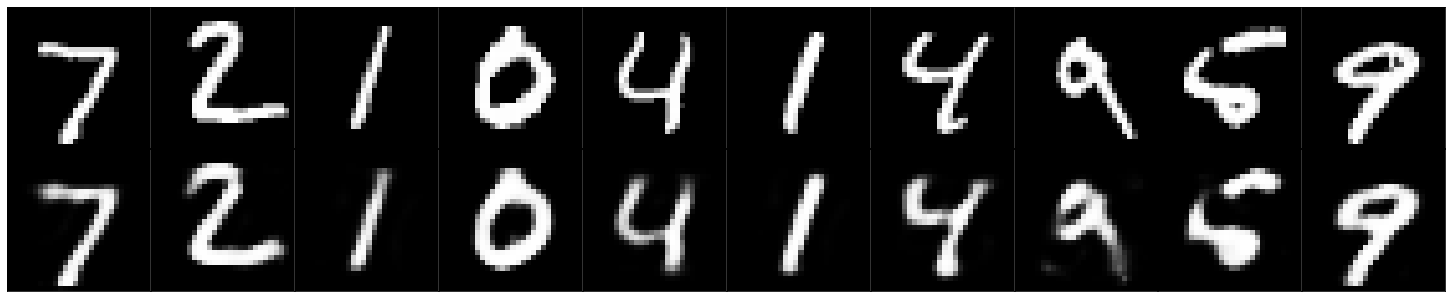

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=10, sharex=True, sharey=True, figsize=(20,4))
in_imgs = mnist.test.images[:10]
reconstructed, compressed = sess.run([decoded, encoded], feed_dict={inputs_: in_imgs})

for images, row in zip([in_imgs, reconstructed], axes):
    for img, ax in zip(images, row):
        ax.imshow(img.reshape((28, 28)), cmap='Greys_r')
        ax.get_xaxis().set_visible(False)
        ax.get_yaxis().set_visible(False)

fig.tight_layout(pad=0.1)

In [9]:
sess.close()

## Up Next

We're dealing with images here, so we can (usually) get better performance using convolution layers. So, next we'll build a better autoencoder with convolutional layers.

In practice, autoencoders aren't actually better at compression compared to typical methods like JPEGs and MP3s. But, they are being used for noise reduction, which you'll also build.